# ***Telecom Churn Case Study- Machine Learning 2***

## **Problem Statement**

***Business problem overview***

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

***Understanding and defining churn***

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

***Definitions of churn***

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

***High-value churn***

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

***Understanding the business objective and the data***

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

***Understanding customer behaviour during churn***
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

 



### Importing libraries , Load and Analyse data

In [1]:
#Import required libraries and set display settings

import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import re

In [2]:
# Load the given data set
telecom_ret = pd.read_csv("telecom_churn_data.csv")

In [3]:
# View the data
telecom_ret.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_ret.shape

(99999, 226)

In [5]:
telecom_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecom_ret.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
#List the Column name
for col in telecom_ret.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

### Data Cleaning:

In [8]:
#Make the last four  column name consistent with others and print again
telecom_ret = telecom_ret.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'})
#lets get all the column names
for col in telecom_ret.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

In [9]:
#Check percentages of Null Values
(100*(telecom_ret.isnull().sum())/len(telecom_ret.index))

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

1. Lets first extract the high value customers before we perform anyother operations on data due to it's huge volume.
2. High value customers will be closed to 29.9K rows which will take lesser time in computation as compare to whole data.
3. Filter high-value customers:As mentioned, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [10]:
#Filter high-value customers: Need to predic churn only for the high-value customers
#Check if they have null values
telecom_ret[['total_rech_amt_7','total_rech_amt_6','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_6','total_rech_data_7']].isnull().sum()

total_rech_amt_7          0
total_rech_amt_6          0
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
total_rech_data_6     74846
total_rech_data_7     74428
dtype: int64

In [11]:
#Impute missing values with '0' to extract high value customers for the set of columns
telecom_ret[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=telecom_ret[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

In [12]:
#Impute all these columns with '0' as they look important for model building
col4 = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
telecom_ret[col4]=telecom_ret[col4].replace(np.nan, 0)

In [13]:
#Check for null values again
telecom_ret.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [14]:
#Sum up all types of data recharge in the month
telecom_ret['total_rech_num_data_6'] = (telecom_ret['count_rech_2g_6']+telecom_ret['count_rech_3g_6']).astype(int)
telecom_ret['total_rech_num_data_7'] = (telecom_ret['count_rech_2g_7']+telecom_ret['count_rech_3g_7']).astype(int)
telecom_ret['total_rech_num_data_8'] = (telecom_ret['count_rech_2g_8']+telecom_ret['count_rech_3g_8']).astype(int)

In [15]:
#Calculate total amount spent on recharging data(mobile internet) in the month
#Multiply amount with number of times it was recharged for data 
telecom_ret['total_rech_amt_data_6'] = telecom_ret['total_rech_num_data_6']*telecom_ret['av_rech_amt_data_6']
telecom_ret['total_rech_amt_data_7'] = telecom_ret['total_rech_num_data_7']*telecom_ret['av_rech_amt_data_7']
telecom_ret['total_rech_amt_data_8'] = telecom_ret['total_rech_num_data_8']*telecom_ret['av_rech_amt_data_8']

In [16]:
#Calculate total monthly recharge for data and voice
telecom_ret['total_month_rech_6'] = telecom_ret['total_rech_amt_6']+telecom_ret['total_rech_amt_data_6']
telecom_ret['total_month_rech_7'] = telecom_ret['total_rech_amt_7']+telecom_ret['total_rech_amt_data_7']
telecom_ret['total_month_rech_8'] = telecom_ret['total_rech_amt_8']+telecom_ret['total_rech_amt_data_8']

#### Extracting High Value Customers

In [17]:
#Extract high value customers based on the average recharge amount in the first two months (June and July)
hv_cust=telecom_ret[telecom_ret[['total_month_rech_6','total_month_rech_7']].mean(axis=1)> telecom_ret[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [18]:
#Get the number of features and observations in new dataset high value customers
hv_cust.shape

(29953, 235)

In [19]:
#Get the all null values of all columns in percentage
(100*(hv_cust.isnull().sum())/len(hv_cust.index))

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
last_date_of_month_9         1.218576
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
onnet_mou_9                  6.336594
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
offnet_mou_9                 6.336594
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_ic_mou_9                6.336594
roam_og_mou_6                1.809502
roam_og_mou_

In [20]:
# Define a function  to find all the columns where more than  cut off percentahe of values are null.
# Call the function with cutoff value 49
def nullvalue(cutoff):
    null = (100*(hv_cust.isnull().sum())/len(hv_cust.index))
    return null.loc[null > cutoff]
nullvalue(49)

date_of_last_rech_data_9    49.253831
max_rech_data_9             49.253831
count_rech_2g_9             49.253831
count_rech_3g_9             49.253831
arpu_3g_9                   49.253831
arpu_2g_9                   49.253831
night_pck_user_9            49.253831
fb_user_9                   49.253831
dtype: float64

#### Tag churners and remove attributes of the churn phase

In [21]:
col1 = ['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']
hv_cust['churn']=hv_cust[col1].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [22]:
print("Total number of customers churned is:",len(hv_cust[hv_cust['churn']==1]))
print("Total number of customers non-churned is:",len(hv_cust[hv_cust['churn']==0]))

Total number of customers churned is: 2433
Total number of customers non-churned is: 27520


In [23]:
#Get the number of rows and columns
hv_cust.shape

(29953, 236)

In [24]:
#Remove all the attributes (_9_) corresponding to the churn phase
import re
#Filter all columns where last char in column name is _9
col2 = hv_cust.filter(regex=('_9')).columns
#Drop these columns as mentioned
hv_cust.drop(col2,axis=1,inplace=True)

In [25]:
#Get the number of features and observations in new dataset high value customers
hv_cust.shape

(29953, 181)

Now we are left with 181 features. Lets proceed further and create some new features.

In [26]:
#Drop  Circle id and mobile number
hv_cust.circle_id.value_counts()
hv_cust.drop(['circle_id','mobile_number'],axis=1,inplace=True)

In [27]:
#Convert date  into correct format
column3 = hv_cust.filter(regex=('date')).columns
column3

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], dtype='object')

In [28]:
#Convert dtype of date columns to datetime
hv_cust['last_date_of_month_6'] = pd.to_datetime(hv_cust['last_date_of_month_6'], format='%m/%d/%Y')
hv_cust['last_date_of_month_7'] = pd.to_datetime(hv_cust['last_date_of_month_7'], format='%m/%d/%Y')
hv_cust['last_date_of_month_8'] = pd.to_datetime(hv_cust['last_date_of_month_8'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_6'] = pd.to_datetime(hv_cust['date_of_last_rech_6'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_7'] = pd.to_datetime(hv_cust['date_of_last_rech_7'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_8'] = pd.to_datetime(hv_cust['date_of_last_rech_8'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_data_6'] = pd.to_datetime(hv_cust['date_of_last_rech_data_6'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_data_7'] = pd.to_datetime(hv_cust['date_of_last_rech_data_7'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_data_8'] = pd.to_datetime(hv_cust['date_of_last_rech_data_8'], format='%m/%d/%Y')

In [29]:
# Get columns which have more than 0% missing values
nullvalue(0)

loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_6             1.809502
loc_og_t2m_mou_7             1.789470
loc_og_t2m_mou_8             3.912797
loc_og_t2f_mou_6             1.809502
loc_og_t2f_mou_7             1.789470
loc_og_t2f_mou_8             3.912797
loc_og_t2c_m

In [30]:
#Verify the columns which have only values 
print(hv_cust['loc_og_t2o_mou'].unique())
print(hv_cust['std_og_t2o_mou'].unique())
print(hv_cust['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [31]:
#Drop above 3 columns from dataset
hv_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True,axis=1)

In [32]:
print(hv_cust['std_og_t2c_mou_6'].unique())
print(hv_cust['std_og_t2c_mou_7'].unique())
print(hv_cust['std_og_t2c_mou_8'].unique())
print(hv_cust['std_ic_t2o_mou_6'].unique())
print(hv_cust['std_ic_t2o_mou_7'].unique())
print(hv_cust['std_ic_t2o_mou_8'].unique())

[nan  0.]
[nan  0.]
[ 0. nan]
[nan  0.]
[nan  0.]
[ 0. nan]


In [33]:
#Drop above 6 columns from dataset
hv_cust.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [34]:
#Get columns which have more than 3% missing values
nullvalue(3)

onnet_mou_8                  3.912797
offnet_mou_8                 3.912797
roam_ic_mou_8                3.912797
roam_og_mou_8                3.912797
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_8             3.912797
loc_og_t2f_mou_8             3.912797
loc_og_t2c_mou_8             3.912797
loc_og_mou_8                 3.912797
std_og_t2t_mou_8             3.912797
std_og_t2m_mou_8             3.912797
std_og_t2f_mou_8             3.912797
std_og_mou_8                 3.912797
isd_og_mou_8                 3.912797
spl_og_mou_8                 3.912797
og_others_8                  3.912797
loc_ic_t2t_mou_8             3.912797
loc_ic_t2m_mou_8             3.912797
loc_ic_t2f_mou_8             3.912797
loc_ic_mou_8                 3.912797
std_ic_t2t_mou_8             3.912797
std_ic_t2m_mou_8             3.912797
std_ic_t2f_mou_8             3.912797
std_ic_mou_8                 3.912797
spl_ic_mou_8                 3.912797
isd_ic_mou_8                 3.912797
ic_others_8 

In [35]:
#Drop these columns 3 date columns which have more than 40% values as null.
hv_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)

1. Above details show that all these columns belogn to 8th month and have same percentage of null values.
2. Lets impute these columns with zeros.

In [36]:
missing3 = list(nullvalue(3).index)
missing3

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [37]:
#Impute all these columns with '0' as they look important for model building
hv_cust[missing3]=hv_cust[missing3].replace(np.nan, 0)

In [38]:
#Identify  date columns for unique values.
hv_cust['date_of_last_rech_6'].unique()
hv_cust['date_of_last_rech_7'].unique()
hv_cust['date_of_last_rech_8'].unique()

array(['2014-08-08T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-08-30T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-08-24T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-08-23T00:00:00.000000000', '2014-08-02T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2014-08-29T00:00:00.000000000', '2014-08-25T00:00:00.000000000',
       '2014-08-17T00:00:00.000000000', '2014-08-22T00:00:00.000000000',
       '2014-08-19T00:00:00.000000000',                           'NaT',
       '2014-08-15T00:00:00.000000000', '2014-08-09T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-08-06T00:00:00.000000000', '2014-08-10T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-07T00:00:00.000000000', '2014-08-11T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-18

In [39]:
#Imputing  null values with the previous ones
hv_cust['date_of_last_rech_6'].fillna(method ='pad',inplace=True) 
hv_cust['date_of_last_rech_7'].fillna(method ='pad',inplace=True) 
hv_cust['date_of_last_rech_8'].fillna(method ='pad',inplace=True) 
#lets get columns which have more than 1% missing values
nullvalue(0)

last_date_of_month_7    0.090141
last_date_of_month_8    0.550863
onnet_mou_6             1.809502
onnet_mou_7             1.789470
offnet_mou_6            1.809502
offnet_mou_7            1.789470
roam_ic_mou_6           1.809502
roam_ic_mou_7           1.789470
roam_og_mou_6           1.809502
roam_og_mou_7           1.789470
loc_og_t2t_mou_6        1.809502
loc_og_t2t_mou_7        1.789470
loc_og_t2m_mou_6        1.809502
loc_og_t2m_mou_7        1.789470
loc_og_t2f_mou_6        1.809502
loc_og_t2f_mou_7        1.789470
loc_og_t2c_mou_6        1.809502
loc_og_t2c_mou_7        1.789470
loc_og_mou_6            1.809502
loc_og_mou_7            1.789470
std_og_t2t_mou_6        1.809502
std_og_t2t_mou_7        1.789470
std_og_t2m_mou_6        1.809502
std_og_t2m_mou_7        1.789470
std_og_t2f_mou_6        1.809502
std_og_t2f_mou_7        1.789470
std_og_mou_6            1.809502
std_og_mou_7            1.789470
isd_og_mou_6            1.809502
isd_og_mou_7            1.789470
spl_og_mou

In [40]:
# Get date columns for unique values.
print(hv_cust['last_date_of_month_7'].unique())
hv_cust['last_date_of_month_8'].unique()
# they all have same dates for the month in all their rows and null values for few.
# we will just impute a particular same date of that month for all those null value rows.

['2014-07-31T00:00:00.000000000'                           'NaT']


array(['2014-08-31T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [41]:
#Imputing null values with the previous ones in the dataset
hv_cust['last_date_of_month_7'].fillna(method ='pad',inplace=True) 
hv_cust['last_date_of_month_8'].fillna(method ='pad',inplace=True) 

In [42]:
#Get all the columns with null values as they are important for our analysis.
missing0 = list(nullvalue(0).index)

In [43]:
#Impute all these columns with '0' as they look important for model building
hv_cust[missing0]=hv_cust[missing0].replace(np.nan, 0)

In [44]:
#Display null values
nullvalue(0)

Series([], dtype: float64)

In [45]:
hv_cust.shape

(29953, 167)

In [46]:
#lets list all the columns as of now
hv_cust.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 's

### Exploratory Data Analysis(EDA):

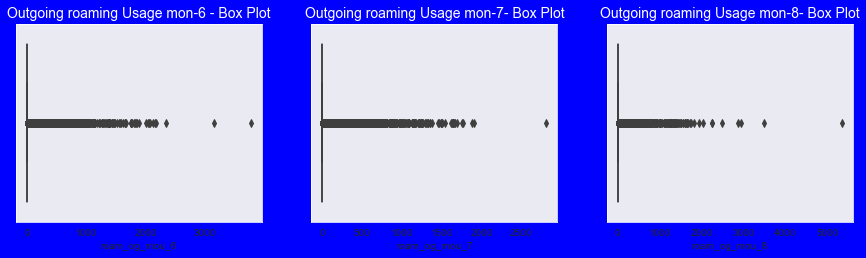

In [47]:
# Display distribution of same fields in each month using box plot.
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['roam_og_mou_6'])
ax.set_title('Outgoing roaming Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['roam_og_mou_7'])
ax.set_title('Outgoing roaming Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_cust['roam_og_mou_8'])
ax.set_title('Outgoing roaming Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of roaming usage shows august month usage has reduced for sure. 
# but it should have been increased if customer is happy.

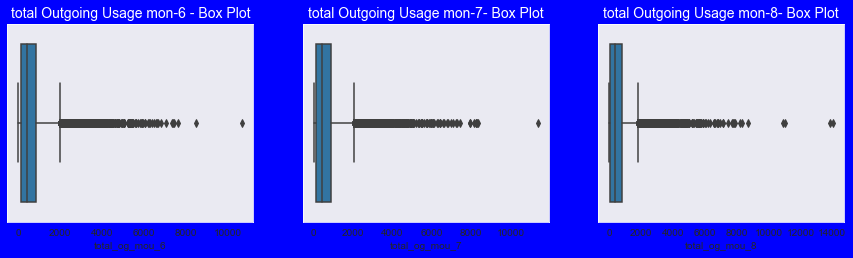

In [48]:
# Diaplay distribution of same fields in each motnh using box plot.

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['total_og_mou_6'])
ax.set_title('total Outgoing Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['total_og_mou_7'])
ax.set_title('total Outgoing Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_cust['total_og_mou_8'])
ax.set_title('total Outgoing Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of total outgoing usage shows august month usage has reduced for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

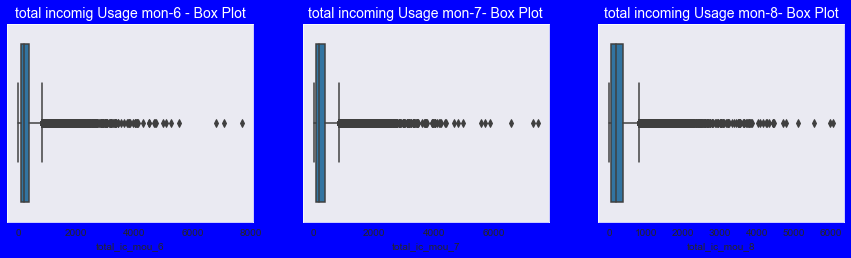

In [49]:
#Display distribution of same fields in each motnh using box plot.

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['total_ic_mou_6'])
ax.set_title('total incomig Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['total_ic_mou_7'])
ax.set_title('total incoming Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_cust['total_ic_mou_8'])
ax.set_title('total incoming Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of total incoming usage shows august month usage has got better or constant for sure. 

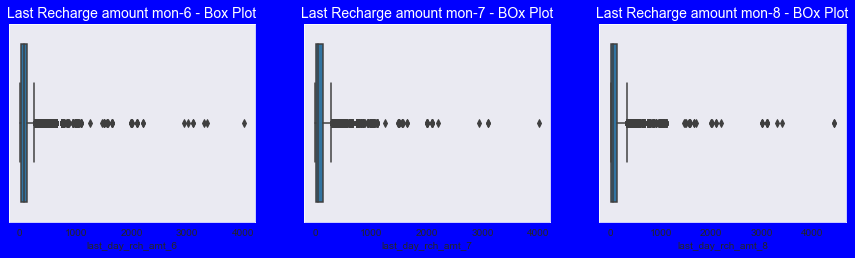

In [50]:
# Diaplay distribution of same fields in each motnh using box plot.

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['last_day_rch_amt_6'])
ax.set_title('Last Recharge amount mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['last_day_rch_amt_7'])
ax.set_title('Last Recharge amount mon-7 - BOx Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_cust['last_day_rch_amt_8'])
ax.set_title('Last Recharge amount mon-8 - BOx Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of recharge amount in august shows customer has reduced recharge amount for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

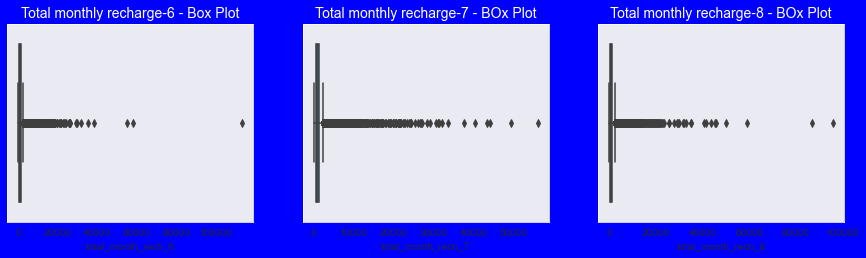

In [51]:
# Dispaly distribution of same fields in each motnh using box plot.


plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['total_month_rech_6'])
ax.set_title('Total monthly recharge-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['total_month_rech_7'])
ax.set_title('Total monthly recharge-7 - BOx Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_cust['total_month_rech_8'])
ax.set_title('Total monthly recharge-8 - BOx Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of total monthly recharge amount in august shows customer has reduced recharge amount for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

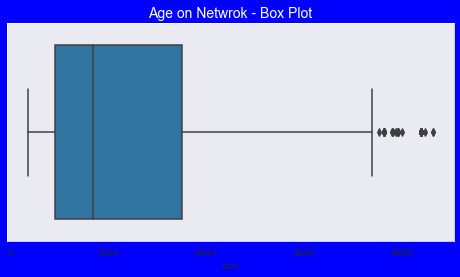

In [52]:
# Display distribution of same fields in each motnh using box plot.

plt.figure(figsize=(8,4),facecolor='b')
sns.set_style("dark")
ax = sns.boxplot(hv_cust['aon'])
ax.set_title('Age on Netwrok - Box Plot',fontsize=14,color='w')
plt.show()

### Observations for below analysis are mentioned at last.

In [53]:
#Total  MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
churn,,,
0,54563.91,55534.23,55447.61
1,10583.71,7637.07,3022.98


In [54]:
#Mean of total 3G usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,350.198817,383.853492,375.182483
1,282.056272,220.009203,87.687065


In [55]:
#Mean of total 2G usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,127.796845,128.214998,113.180262
1,112.114344,90.030806,23.228874


In [56]:
#Meanof total std MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['std_og_mou_6','std_og_mou_7','std_og_mou_8'].mean()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,324.526938,353.807279,320.879212
1,603.007176,481.410875,156.169630


In [57]:
#Sum of total special MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum()

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
churn,,,
0,156973.46,194996.87,189603.80
1,17505.08,17870.57,6559.12


In [58]:
#Mean of total incoming MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.294077,306.993108,299.218000
1,231.614612,183.280103,63.535134


In [59]:
#Mean of total outgoing MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,593.996050,628.720470,582.177405
1,791.737004,628.765261,209.794521


In [60]:
#Mean of total monthly recharge per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,649.969222,663.889971,613.977871
1,787.330867,627.459104,253.686806


In [61]:
#Mean of outgoing in roaming usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,24.353277,17.500751,17.781574
1,51.964168,50.179223,43.730012


In [62]:
#Mean of maximum recharge amount per month churn vs Non-Churn
hv_cust.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.097892,173.397711,166.827398
1,172.178792,159.655569,85.536375


In [63]:
#Mean of count of total data recharge per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_rech_num_data_6','total_rech_num_data_7','total_rech_num_data_8'].mean()

,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8
churn,,,
0,1.678561,1.903488,1.729688
1,1.568845,1.317304,0.416358


In [64]:
#Mean of last recharge amount churn vs Non-Churn
hv_cust.groupby(['churn'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean()

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.615516,102.284048,97.455015
1,104.541307,78.810522,35.752158


In [65]:
#Mean of local outgoing on same network usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'].mean()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8
churn,,,
0,86.762150,89.383115,83.639239
1,59.825035,44.813354,16.101500


In [66]:
#Mean of age on network churn vs Non-Churn
hv_cust.groupby(['churn'])['aon'].mean()

churn
0    1240.103016
1     860.643650
Name: aon, dtype: float64

### Inferences:


 - Incoming calls were reduced in action phase i.e. in august
 - Outgoing calls were reduced in action phase i.e. in august
 - Total recharge amount reduced in action phase i.e. in august
 - Total data recharge reduced in action phase i.e. in august
 - Reuction is not just normal but significant.
 - Those who churned were customers who used services for less days as compared to customers who didn't churn.
 - Overall most of the services that customer was using, reduced to low in action phase 8th month.

### Build some Models on Train data and test it later.

In [67]:
#Copy the dataframe to another before we do other activities
hv_custcopy = hv_cust
print(hv_custcopy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 167 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](6), float64(132), int32(3), int64(26)
memory usage: 38.0 MB
None


In [68]:
hv_custcopy.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [69]:
hv_custcopy.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,299

In [70]:
#Removing aon column 
hv_custcopy.drop(['aon'], axis=1, inplace=True)

In [71]:
#Remove datetime columns from dataset else it will give error further
datecols = list(hv_custcopy.select_dtypes(include=['datetime']).columns)
print(datecols)
hv_custcopy.drop(datecols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [72]:
#Import train test split 
from sklearn.model_selection import train_test_split
X = hv_custcopy.drop(['churn'], axis=1)
y = hv_custcopy['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

#### Perform MinMax scaler before performing PCA

In [73]:
#Perform minmax scaling before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
# Fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance using smote

In [75]:
#Print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1752
counts of label '0': 19215


In [76]:
#Perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train)

In [77]:
#Print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 19215
counts of label '0': 19215


In [78]:
#Perform PCA on sampled data. import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [79]:
#Fit PCA on the train dataset
pca.fit(X_train_smo)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [80]:
pca.explained_variance_ratio_[:50]

array([0.54962996, 0.12395377, 0.08596459, 0.02645379, 0.02553412,
       0.01989028, 0.01961309, 0.01502192, 0.01183865, 0.00893219,
       0.00800085, 0.00764161, 0.00636769, 0.0059214 , 0.00500292,
       0.00456677, 0.00414671, 0.00391858, 0.00389134, 0.00365877,
       0.00333031, 0.00309394, 0.0030239 , 0.00287003, 0.00259727,
       0.00244915, 0.00243319, 0.00239676, 0.00220472, 0.00213734,
       0.00183242, 0.00170427, 0.00152387, 0.001381  , 0.00134874,
       0.00122201, 0.00119702, 0.0011505 , 0.00112626, 0.00106801,
       0.00095014, 0.00084704, 0.00081064, 0.00077045, 0.00075709,
       0.00071364, 0.00069095, 0.00064189, 0.00062155, 0.0006081 ])

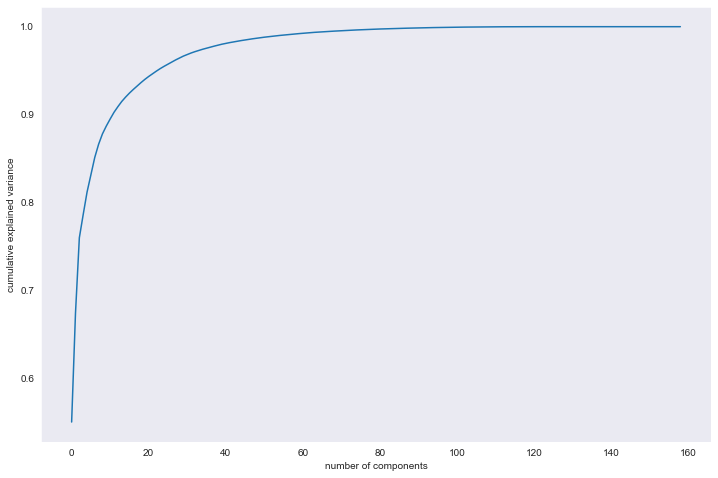

In [81]:
#Draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Plot shows that 35 components are enough to explain close to 95% variance

In [82]:
#Perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=35)

In [83]:
#Fit
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(38430, 35)

In [84]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#correlations are close to 0

max corr: 0.013077545978460666 , min corr:  -0.00936331319397996


In [85]:
#Applying selected components to the test data - 35 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(8986, 35)

### Modeling : Logistic Regression 

In [86]:
#Import library and fit train model on train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca2 = LogisticRegression(class_weight='balanced')
learner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
#Predict on training set
dtrain_predictions = learner_pca2.predict(X_train_pca)
dtrain_predprob = learner_pca2.predict_proba(X_train_pca)[:,1]

In [88]:
#Print scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.8304970075461878
Recall/Sensitivity : 0.8480353890189956
AUC Score (Train): 0.9025909059115699


In [89]:
#Predict on test dataset.
pred_probs_test = learner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8186240265360375
precision score: 0.26121128062875637
Sensitivity/Recall : 0.8296622613803231
Specificity: 0.8075857916917519
False Positive Rate: 0.19241420830824804
Positive predictive value: 0.26121128062875637
Negative Predictive value: 0.9829986809321413
Accuracy : 0.8092588470954819


In [90]:
#Check with probability cutoff 0.5
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.122701,0
1,0,0.840412,1
2,0,0.215176,0
3,0,0.084570,0
4,0,0.060290,0


In [91]:
#Define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

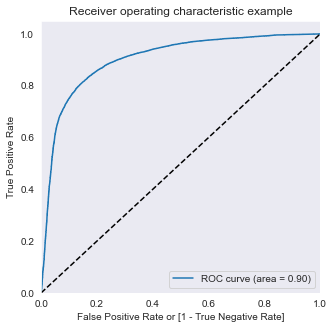

In [93]:
#Draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [94]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122701,0,1,1,0,0,0,0,0,0,0,0
1,0,0.840412,1,1,1,1,1,1,1,1,1,1,0
2,0,0.215176,0,1,1,1,0,0,0,0,0,0,0
3,0,0.084570,0,1,0,0,0,0,0,0,0,0,0
4,0,0.060290,0,1,0,0,0,0,0,0,0,0,0


In [95]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.675540  0.978402  0.372678
0.2   0.2  0.744470  0.956805  0.532136
0.3   0.3  0.787692  0.927192  0.648192
0.4   0.4  0.816836  0.893677  0.739995
0.5   0.5  0.830497  0.848035  0.812959
0.6   0.6  0.831434  0.787302  0.875566
0.7   0.7  0.817903  0.719178  0.916628
0.8   0.8  0.777466  0.603591  0.951340
0.9   0.9  0.588394  0.190736  0.986053


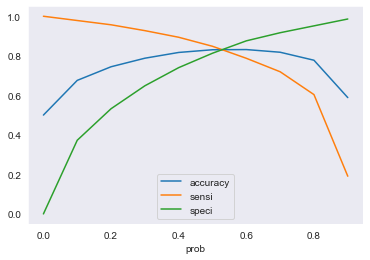

In [96]:
#Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [97]:
#Apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.122701,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.840412,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.215176,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.084570,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.060290,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
#Predict on train dataset with optimal cutoff probability
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.122701,0
1,0,0.840412,1
2,0,0.215176,0
3,0,0.084570,0
4,0,0.060290,0


In [99]:
#Find out all scores of train dataset
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8252927400468384
precision score: 0.7976570312872041
Sensitivity/Recall : 0.8717148061410357
Specificity: 0.7788706739526412
False Positive Rate: 0.22112932604735883
Positive predictive value: 0.7976570312872041
Negative Predictive value: 0.8585852791004532


In [100]:
#Predict on test datset with optimal cutoff obtained earlier
y_test_pred = learner_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.076537,0
29754,0,0.031939,0
50131,0,0.046833,0
66630,0,0.173290,0
91920,0,0.167279,0


In [101]:
#Find out all scores of test dataset
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8090721669535452
precision score : 0.23266129032258065
Sensitivity/Recall : 0.8472834067547724
Specificity: 0.7708609271523179
False Positive Rate: 0.22913907284768212
Positive predictive value: 0.23266129032258065
Negative Predictive value: 0.984014755610206


### Apply Random forest Modeling 

### Tuning max_depth

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

In [ ]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_depth 20 looks good.

### Tuning n_estimators

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# Instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=20)

# Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimators 80 looks good.

### Tuning max_features

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# Instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80)


# Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Selecting max_features = 5

### Tuning min_samples_leaf

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Specify number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# Instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5)


# Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf 100 looks good

### Tuning min_samples_split

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Specify number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# Instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100)


# Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

In [ ]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split looks good for 100.

**Fitting the final model with the best parameters obtained.**

In [ ]:
# Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80,
                             random_state=10)

In [ ]:
# Fit
rf_pca=rfc.fit(X_train_pca,y_train_smo)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [ ]:
#Print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))

In [ ]:
#Predict on test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

In [ ]:
#Check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

In [ ]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

In [ ]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
#Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [ ]:
#Apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
#Predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predrf_final.head()

In [ ]:
#Find out all scores of train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

In [ ]:
#Predict on test datset with optimal cutoff obtained earlier
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predrf_final.head()

In [ ]:
#Find out all scores of test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

#### Train and test Recall score of Random forest:

- Train Sensitivity/Recall:0.892583918813427
- Test Sensitivity/Recall:0.8002936857562408

#### Train and test Recall score with logistics regression :
- Train Sensitivity/Recall: 0.8716627634660421
- Test Sensitivity/Recall : 0.8472834067547724



### Recommend strategies to manage customer churn - Random Forest

In [ ]:
# Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80)

In [ ]:
# Fit
rfc.fit(X_train_smo,y_train_smo)

In [ ]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

 - From above plot, almost all the features of top 25 most important features are from action phase that is   August month. Hence we need to focus on these features to identify high value customers who may churn in future. 
 - Lets look into some of the features

1. loc_ic_mou_8 - Local Incoming calls Minutes of usage - voice calls in 8th Month
2. total_rech_amt_8 - Total recharge amount in 8th month
3. loc_ic_t2m_mou_8 -Local Incoming calls Operator T to other operator mobile Minutes of usage - voice calls in 8th Month
4. loc_og_mou_8 - Local Outgoing calls mobile Minutes of usage - voice calls in 8th Month
5. max_rech_amt_8 - Max recharge amount in 8th month
6. roam_ic_mou_8 - Roaming incoming calls Minutes of usage - voice calls in 8th Month
7. last_day_rch_amt_8 - Last recharge amount in 8th month.
8. total_month_rech_8 - Total recharge amount in 8th month
9. total_ic_mou_8 - Total incoming calls Minutes of usage - voice calls in 8th Month
10. total_og_mou_8 - Total Outgoing calls mobile Minutes of usage - voice calls in 8th Month
11. loc_og_t2t_mou_8 - Local Outgoing calls within same operator mobile Minutes of usage - voice calls in 8th Month
12. roam_og_mou_8 - Roaming outgoing calls Minutes of usage - voice calls in 8th Month
13. offnet_mou_8 - All kinds of calls outside the operator T network Minutes of usage - voice calls in 8th Month
14. total_rech_num_data_8 - total number of data recharges done in the month 8
15. loc_ic_t2t_mou_8-Local Incoming calls within same operator mobile Minutes of usage - voice calls in 8th Month

### Recommendations

- Important factors that Telecom company should monitor is above 25 features

- Number of Incoming and outgoing calls from a mobile number in a particular month by customer. If the number of calls starts reducing then it may be a sign of a customer trying to switch from one network to another network or he has already switched and used the current network for a few days.

- Recharge amount is a very important factor to notice if it starts reducing month by month then it needs to be looked at as the customer may not be happy with the services he is getting that is why he started recharging with less amount.

- If data usage starts decreasing and in the august month it is minimal then it shows the customer is not getting good speed of internet.

- If the internet speed that the customer is getting is good, the customer will finish data soon and recharge it again but if the network is poor and speed is not good then the customer will not be able to finish it and will not recharge it multiple times. so need to look into areas where the network is poor and customer care is receiving complaints multiple times.

- if all kinds of call and data usage reduces then it is a serious concern as the customer may be planning to churn and just time passing for a few more days. so the company need to look into these areas.

- if the customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to the network where incoming and outgoing services are at reasonable rate.